In [1]:
!pip install fredapi > null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '9ca944cf88a4cf16b87a3d012ec8bf29'

# 1. Create The Fred Object

In [3]:
fred = Fred(api_key=fred_key)

# 2. Search for economic date!

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [56]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-07-17,2024-07-17,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-07-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-16 08:49:03-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-07-17,2024-07-17,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-07-17,2024-07-17,S&P 500,2014-07-17,2024-07-16,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-16 20:33:58-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-07-17,2024-07-17,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-07-17,2024-07-17,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-07-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-16 08:48:05-05:00,82,This data represents the effective yield of th...


# 3. Pull Raw Data & Plot

<Axes: title={'center': 'S&P 500'}>

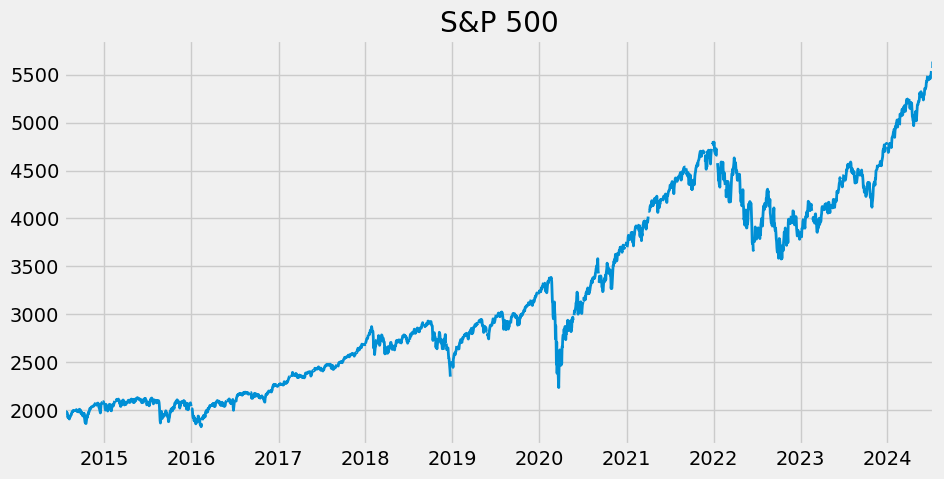

In [13]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [22]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[(unemp_df['title'].str.contains('Unemployment Rate')) & (~unemp_df['title'].str.contains('-|,|Region|Division'))]